In [7]:
# Funkcja pobierająca dane z pliku .csv 
import csv

def getData(file_name: str) -> list[list[str]]:
    data = []
    with open(file_name, 'r') as file:
        csv_read = csv.reader(file, delimiter= ',')
        for row in csv_read:
            data.append(row)
    return data

In [8]:
data = getData("shopping_behavior_updated.csv")
data[14]

['14',
 '65',
 'Male',
 'Dress',
 'Clothing',
 '51',
 'New Hampshire',
 'M',
 'Violet',
 'Spring',
 '4.7',
 'Yes',
 'Express',
 'Yes',
 'Yes',
 '31',
 'PayPal',
 'Weekly']

In [9]:
#1.1. Funkcja zwracająca całkowite wydatki wszystkich kupujących w każdym sezonie i posortować w kolejności malejącej.

def seasonSummary(data: list[list[str]]) -> dict:
    season_summary = {}
    data_season_idx = data[0].index('Season')
    data_profit_idx = data[0].index('Purchase Amount (USD)')

    for idx in data[1:]:
        if idx[data_season_idx] not in season_summary:
            season_summary[idx[data_season_idx]] = [int(idx[data_profit_idx])]
        else:
            season_summary[idx[data_season_idx]].append(int(idx[data_profit_idx]))

    for k, v in season_summary.items():
        season_summary[k] = [sum(v)]

    season_summary = dict(sorted(season_summary.items(), key=lambda item: item[1], reverse=True))

    return season_summary

In [10]:
seasonSummary(data= data)

{'Fall': [60018], 'Spring': [58679], 'Winter': [58607], 'Summer': [55777]}

In [11]:
# 1.2. Funkcja zwracająca 3 najczęściej kupowane kolory torebek (Handbag)

def threeMFPBags(data: list[list[str]]) -> dict:
    three_MFPBags = {}
    
    data_color_idx = data[0].index('Color')
    data_item_idx = data[0].index('Item Purchased')

    for idx in data[1:]:
        if idx[data_item_idx] == "Handbag":
            if idx[data_color_idx] not in three_MFPBags:
                three_MFPBags[idx[data_color_idx]] = 1
            else:   
                three_MFPBags[idx[data_color_idx]] += 1

    three_MFPBags = dict(sorted(three_MFPBags.items(), key= lambda x: x[1], reverse= True)[:3])

    return three_MFPBags


In [12]:
threeMFPBags(data= data)


{'Charcoal': 12, 'Yellow': 11, 'Gray': 10}

In [13]:
# 1.3. Funkcja zwracająca mężczyzn, w wieku 18-25 lat, którzy zakupili bluzki (Blouse) w rozmiarze XL

def checkXLMen(data: list[list[str]]):
    
    data_gender_idx = data[0].index('Gender')
    data_age_idx = data[0].index('Age')
    data_item_idx = data[0].index('Item Purchased')
    data_size_idx = data[0].index('Size')

    for idx in data[1:]:
        if idx[data_gender_idx] == "Male" and int(idx[data_age_idx]) in [i for i in range(18, 26)] and idx[data_item_idx] == "Blouse" and idx[data_size_idx] == "XL":
            print(f"{idx[data_gender_idx]}: {idx[data_age_idx]}, bought {idx[data_item_idx]} in {idx[data_size_idx]} size")

In [14]:
checkXLMen(data= data)

Male: 19, bought Blouse in XL size
Male: 18, bought Blouse in XL size


In [15]:
# 1.4. Wykres kołowy prezentujący rozkład rodzajów kupowanych ubrań wśród kobiet w wieku 25-45 lat
import matplotlib.pyplot as plt
from itertools import groupby

def clothesDistribution(data: list[list[str]]) -> dict:

    clothes_distribution = {}

    data_gender_idx = data[0].index('Gender')
    data_age_idx = data[0].index('Age')
    data_item_idx = data[0].index('Category')

    for idx in data[1:]:
        if int(idx[data_age_idx]) in [i for i in range(25, 46)] and idx[data_gender_idx] == 'Female':
            if idx[data_item_idx] not in clothes_distribution:
                clothes_distribution[idx[data_item_idx]] = 1
            else:
                clothes_distribution[idx[data_item_idx]] += 1
    

    return clothes_distribution

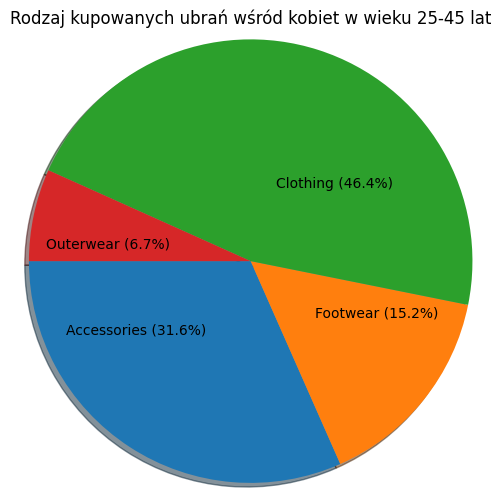

In [16]:
clth_distribution = clothesDistribution(data= data)

total = 0
for k, v in clth_distribution.items():
    total += clth_distribution[k]

percentages = [k + " ("+ "{0:.1%}".format(v/total) + ")" for k, v in clth_distribution.items()]

plt.pie(clth_distribution.values(), labels= (percentages), labeldistance= 0.37, radius= 1.5, startangle=180, shadow= True)
plt.title("Rodzaj kupowanych ubrań wśród kobiet w wieku 25-45 lat",y = 1.12)
plt.show()

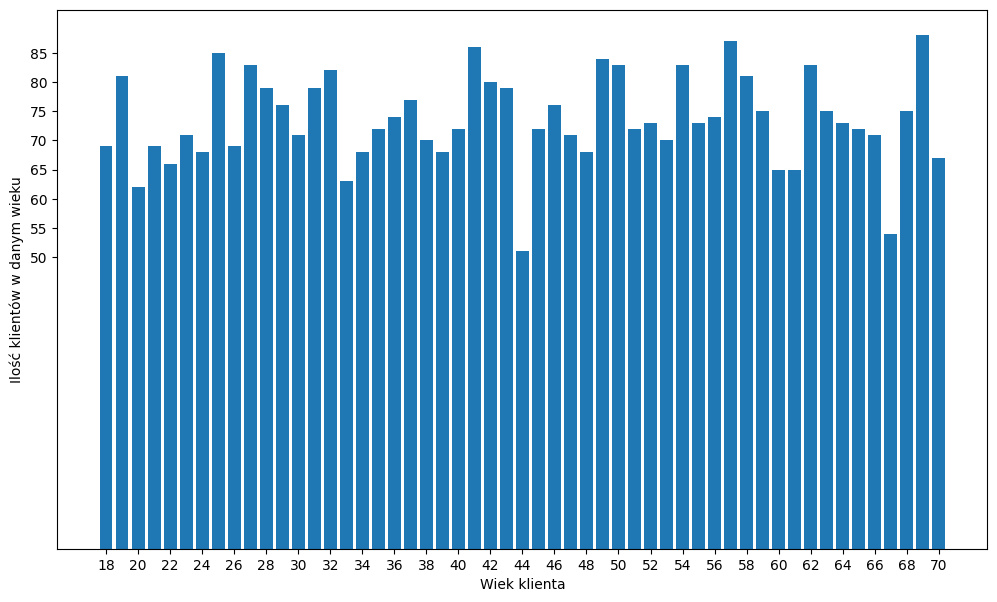

In [17]:
# 1.5. Rozkład wieku w danych w postaci histogramu
import numpy as np
data_age = {}

data_age_idx = data[0].index('Age')
for idx in data[1:]:
    if idx[data_age_idx] not in data_age:
        data_age[idx[data_age_idx]] = 1
    else:
        data_age[idx[data_age_idx]] += 1

data_age = {k: data_age[k] for k in sorted(data_age)}

plt.figure(figsize=(12, 7))
plt.bar(data_age.keys(), data_age.values())
plt.xticks(np.arange(0, 53, 2))
plt.yticks(np.arange(50, 90, 5))
plt.xlabel("Wiek klienta")
plt.ylabel("Ilość klientów w danym wieku")
plt.grid(axis= 'y', which='minor')
plt.show()

In [18]:
# 1.6.1. Powiązanie metody dostawy z metodą płatności

def methodsAssociation():
    methods_association = {}

    data_ship_idx = data[0].index('Shipping Type')
    data_payment_idx = data[0].index('Payment Method')

    for idx in data[1:]:
        if idx[data_ship_idx] not in methods_association:
            methods_association[idx[data_ship_idx]] = {}
        if idx[data_payment_idx] not in methods_association[idx[data_ship_idx]]:
            methods_association[idx[data_ship_idx]][idx[data_payment_idx]] = 1
        else:
            methods_association[idx[data_ship_idx]][idx[data_payment_idx]] += 1
    
    for k, v in methods_association.items():
        methods_association[k] = dict(sorted(v.items(), key= lambda x: x[1]))
        
    return methods_association

mth_association = methodsAssociation()
mth_association_inner = mth_association.values()
for k, v in mth_association.items():
    print(f"{k} -> {v}\n")

Express -> {'Bank Transfer': 91, 'Debit Card': 98, 'Venmo': 106, 'Cash': 108, 'Credit Card': 114, 'PayPal': 129}

Free Shipping -> {'Bank Transfer': 101, 'Venmo': 106, 'Credit Card': 107, 'Debit Card': 117, 'Cash': 121, 'PayPal': 123}

Next Day Air -> {'Cash': 104, 'Debit Card': 105, 'PayPal': 106, 'Credit Card': 108, 'Venmo': 108, 'Bank Transfer': 117}

Standard -> {'Bank Transfer': 93, 'Venmo': 103, 'PayPal': 107, 'Credit Card': 115, 'Debit Card': 118, 'Cash': 118}

2-Day Shipping -> {'Debit Card': 93, 'Bank Transfer': 98, 'Cash': 100, 'Venmo': 104, 'PayPal': 109, 'Credit Card': 123}

Store Pickup -> {'PayPal': 103, 'Credit Card': 104, 'Debit Card': 105, 'Venmo': 107, 'Bank Transfer': 112, 'Cash': 119}



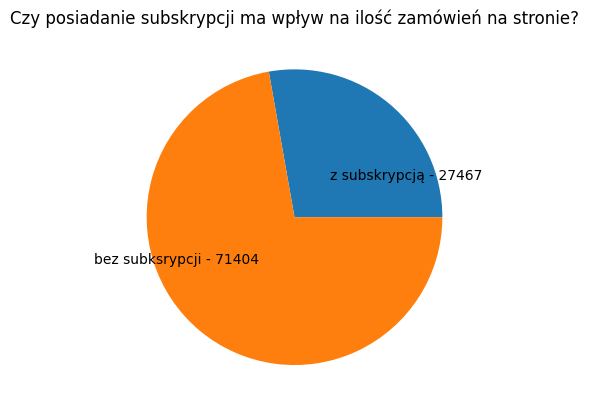

In [19]:
# 1.6.2. Czy posiadanie subskrypcji ma wpływ na ilość zamówień na stronie?

def subscriptionAssociation():
    subscription_association = {}

    data_sub_idx = data[0].index('Subscription Status')
    data_purch_idx = data[0].index('Previous Purchases')

    for idx in data[1:]:
        if idx[data_sub_idx] not in subscription_association:
            subscription_association[idx[data_sub_idx]] = (int(idx[data_purch_idx]))
            subscription_association[idx[data_sub_idx]]
        else:
            subscription_association[idx[data_sub_idx]] += (int(idx[data_purch_idx]))

    return subscription_association

sub_ass = subscriptionAssociation()

labels = [f"{'z subskrypcją' if k == 'Yes' else 'bez subksrypcji'} - {v}" for k, v in sub_ass.items()]

plt.pie(sub_ass.values(), labels= labels, labeldistance= 0.37)
plt.title("Czy posiadanie subskrypcji ma wpływ na ilość zamówień na stronie?")
plt.show()

In [20]:
# 2.1. Funkcja zwracająca całkowite wydatki kupujących w podziale na rodzaj produktu (Category)
import pandas as pd

df = pd.read_csv("shopping_behavior_updated.csv")

df1 = df.groupby('Category')['Purchase Amount (USD)'].apply(sum).reset_index()
df1

C:\Users\Mikołaj Gregorczyk\AppData\Local\Temp\ipykernel_5388\3944363087.py:6: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  df1 = df.groupby('Category')['Purchase Amount (USD)'].apply(sum).reset_index()


,Category,Purchase Amount (USD)
0,Accessories,74200
1,Clothing,104264
2,Footwear,36093
3,Outerwear,18524


In [21]:
# 2.2. Funkcja zwracająca 5 miast, w których kupowano najwięcej sukienek (Dresses)

df2 = df.groupby('Location')['Item Purchased'].apply(lambda x: x.value_counts().get('Dress', 0)).reset_index()
df2 = df2.sort_values(by='Item Purchased', ascending=False).reset_index()
df2 = df2.drop(columns=['index'])
df2.head(5)

,Location,Item Purchased
0,Georgia,8
1,California,7
2,Washington,6
3,Massachusetts,6
4,Rhode Island,6


In [22]:
# 2.3. Funkcja zwracająca kobiety, w wieku poniżej 40 lat, które posiadają subskrypcję dokonały więcej niż 15 zakupów (Previous Purchases)

df3 = df[(df['Gender'] == 'Female') & (df['Age'] < 40) & (df['Subscription Status'] == True) & (df['Previous Purchases'] > 15)]
df3[['Gender','Subscription Status']]

,Gender,Subscription Status


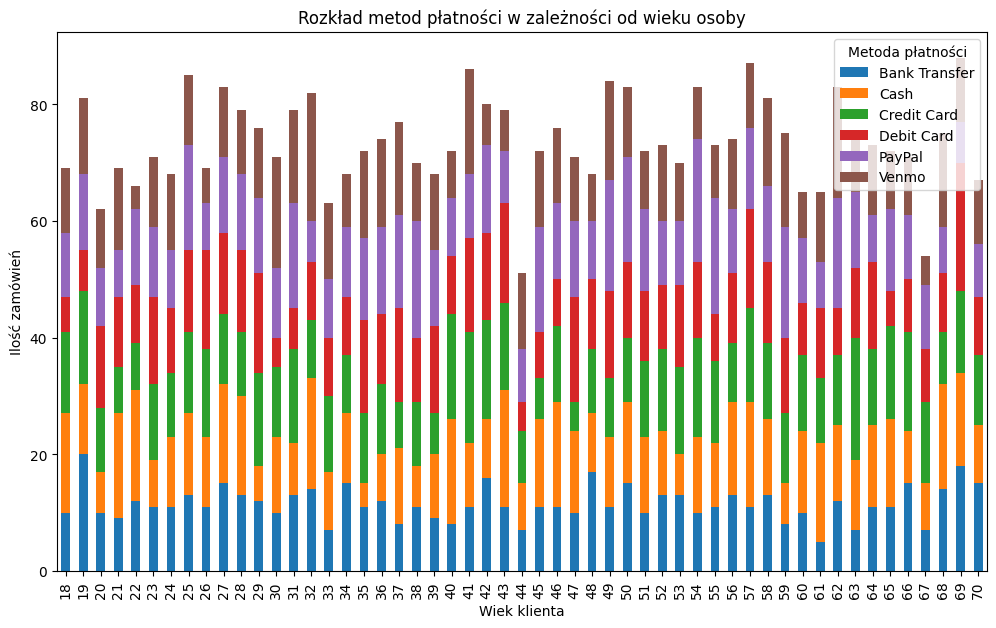

In [23]:
# 2.4. Wykres przedstawiający rozkład metod płatności w zależności od wieku osoby
df4 = df.pivot_table(index='Age', columns='Payment Method', aggfunc='size')

df4.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.xlabel('Wiek klienta')
plt.ylabel('Ilość zamówień')
plt.title('Rozkład metod płatności w zależności od wieku osoby')
plt.legend(title= 'Metoda płatności')
plt.show()

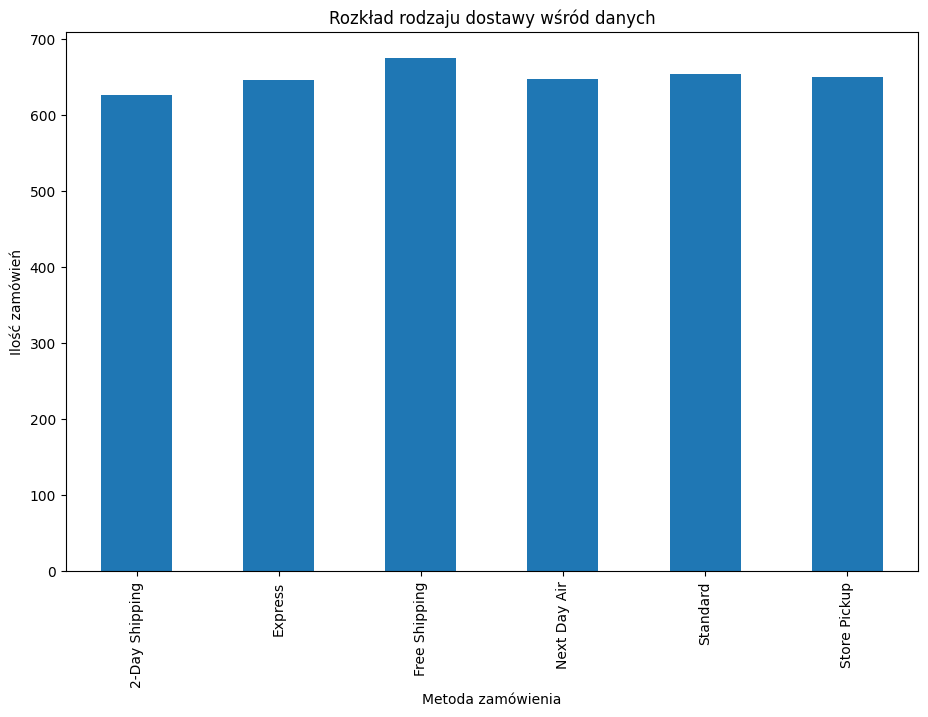

In [24]:
#2.5. Rozkład rodzaju dostawy (Shipping Type) wśród danych w postaci histogramu
df5 = df.pivot_table(index='Shipping Type', aggfunc='size')

df5.plot(kind='bar', stacked=True, figsize=(11, 7))

plt.xlabel('Metoda zamówienia')
plt.ylabel('Ilość zamówień')
plt.title('Rozkład rodzaju dostawy wśród danych')
plt.show()

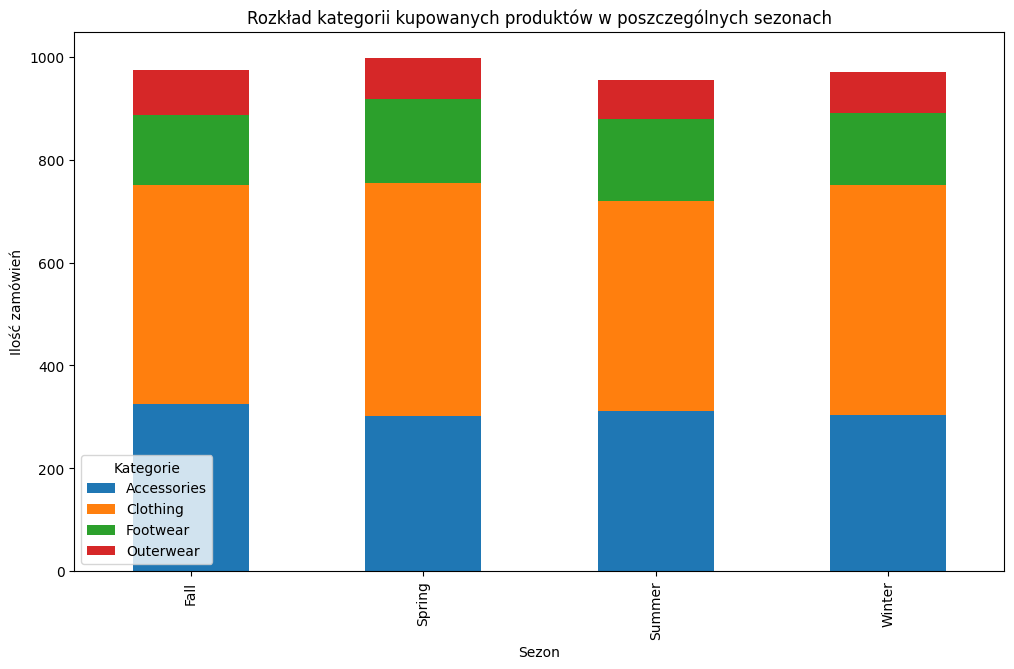

In [25]:
# 2.6.1. Analiza jakie kategorie produktów są kupowane w poszczególnych sezonach
df6 = df.pivot_table(index='Season', columns='Category', aggfunc='size')
df6.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.xlabel('Sezon')
plt.ylabel('Ilość zamówień')
plt.title('Rozkład kategorii kupowanych produktów w poszczególnych sezonach')
plt.legend(title= 'Kategorie')
plt.show()

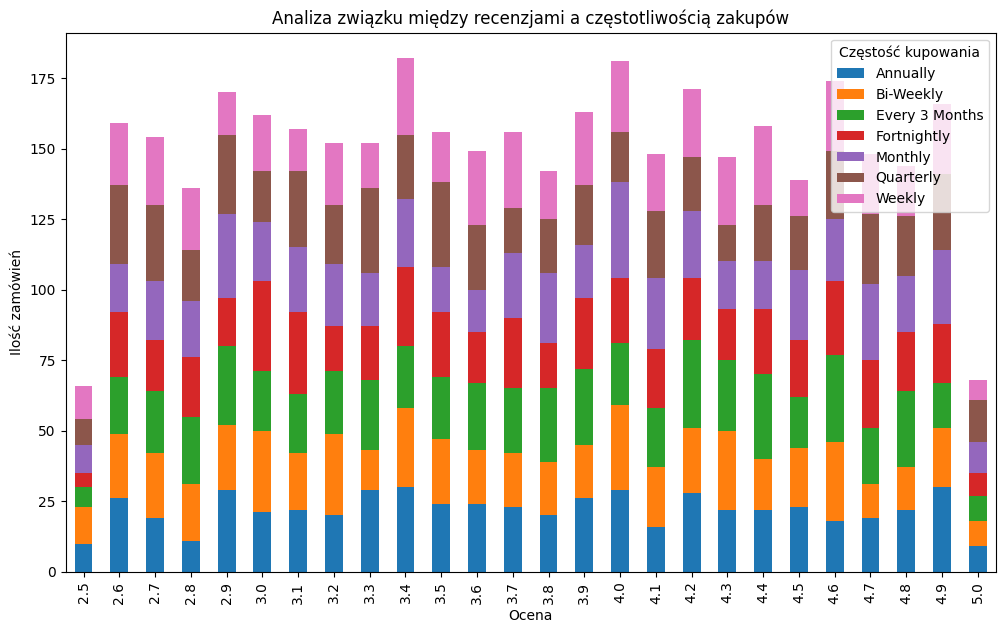

In [26]:
# 2.6.2. Analiza związku między recenzjami a częstotliwością zakupów
df7 = df.pivot_table(index='Review Rating', columns= 'Frequency of Purchases', aggfunc='size')

df7.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Ocena')
plt.ylabel('Ilość zamówień')
plt.title('Analiza związku między recenzjami a częstotliwością zakupów')
plt.legend(title= 'Częstość kupowania')
plt.show()